In [ ]:
# import modul
import pandas as pd
import logging

In [ ]:
# masukkan lokasi data yang digunakan Curah hujan dan juga produksi padi

Data_Produksi = "/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Produksi_Tahunan (1).csv"
Data_Cuaca = "/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Cuaca_Tahunan (2).csv"

In [ ]:
# import data as dataframes
df_Produksi = pd.read_csv(Data_Produksi, sep = ";")
df_Cuaca = pd.read_csv(Data_Cuaca)

In [ ]:
# tampilkan 10 data produksi

df_Produksi.head(10)

,No,Lokasi,Tahun 2021,ahun 2022,Tahun 2023,Tahun 2024
0,1,Pacitan,"88116,57","90428,21","92992,64",0
1,2,Ponorogo,"404665,04","359413,77","392994,08",0
2,3,Trenggalek,"116456,34","115758,01","114874,53",0
3,4,Tulungagung,"237916,96","207217,26","235502,11",0
4,5,Blitar,"247366,27","215482,79","240224,41",0
5,6,Kediri,"198222,01","168853,55","183533,76",0
6,7,Malang,"273358,61","271606,78","279365,91",0
7,8,Lumajang,"295075,52","300829,01","308646,08",0
8,9,Jember,"615697,87","607371,19","616725,77",0
9,10,Banyuwangi,"513490,07","462205,98","454768,46",0


In [ ]:
# info data data Data produksi

df_Produksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          38 non-null     int64 
 1   Lokasi      38 non-null     object
 2   Tahun 2021  38 non-null     object
 3   ahun 2022   38 non-null     object
 4   Tahun 2023  38 non-null     object
 5   Tahun 2024  38 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ KB


In [ ]:
import pandas as pd

# Baca CSV
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Produksi_Tahunan (1).csv", sep=';')

# Tampilkan struktur awal
print("Data Awal:")
print(df.head())
print("\nInformasi DataFrame:")
print(df.info())

# Fungsi untuk memperbaiki nilai desimal yang terpisah
def perbaiki_nilai(nilai):
    try:
        # Handle nilai NaN atau None
        if pd.isna(nilai):
            return None

        # Konversi ke string dan bersihkan whitespace
        str_nilai = str(nilai).strip()

        # Pisah berdasarkan spasi, tab, atau koma
        parts = str_nilai.replace(',', ' ').split()

        if len(parts) == 2:
            # Gabungkan bagian sebelum dan setelah spasi sebagai desimal
            return float(f"{parts[0]}.{parts[1]}")
        elif len(parts) == 1:
            # Cek jika sudah berupa float dengan koma
            if ',' in str_nilai:
                return float(str_nilai.replace(',', '.'))
            return float(str_nilai)
        else:
            return None
    except (ValueError, AttributeError):
        return None

# Terapkan ke kolom-kolom tahun
for tahun in ['2020', '2021', '2022', '2023']:
    if tahun in df.columns:
        df[tahun] = df[tahun].apply(perbaiki_nilai)

# Ekstrak kode dan kabupaten dari kolom Lokasi
if 'Lokasi' in df.columns:
    # Gunakan regex yang lebih robust
    lokasi_split = df['Lokasi'].str.extract(r'(\d+)\s*-\s*(?:Kab\.\s*)?([^\n]*)')

    # Jika ekstraksi berhasil, tambahkan ke DataFrame
    if not lokasi_split.empty:
        df['Kode'] = lokasi_split[0]
        df['Kabupaten'] = lokasi_split[1].str.strip()

        # Hapus kolom yang tidak diperlukan
        columns_to_drop = [col for col in ['No', 'Lokasi'] if col in df.columns]
        df = df.drop(columns=columns_to_drop)

# Reorder kolom - pastikan kolom yang direferensi ada
available_columns = df.columns.tolist()
desired_order = ['Kode', 'Kabupaten'] + [col for col in ['2020', '2021', '2022', '2023'] if col in available_columns]
df = df[[col for col in desired_order if col in available_columns]]

# Cek hasil akhir
print("\nData Hasil Pemrosesan:")
print(df.head())
print("\nInformasi DataFrame Setelah Pemrosesan:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Data Awal:
   No       Lokasi Tahun 2021  ahun 2022 Tahun 2023  Tahun 2024
0   1      Pacitan   88116,57   90428,21   92992,64           0
1   2     Ponorogo  404665,04  359413,77  392994,08           0
2   3   Trenggalek  116456,34  115758,01  114874,53           0
3   4  Tulungagung  237916,96  207217,26  235502,11           0
4   5       Blitar  247366,27  215482,79  240224,41           0

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          38 non-null     int64 
 1   Lokasi      38 non-null     object
 2   Tahun 2021  38 non-null     object
 3   ahun 2022   38 non-null     object
 4   Tahun 2023  38 non-null     object
 5   Tahun 2024  38 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ KB
None

Data Hasil Pemrosesan:
  Kode Kabupaten
0  NaN       NaN
1  NaN       NaN
2  NaN       NaN
3  NaN       N

In [ ]:
# jumlahkan data produksi yang null

df_Produksi.isnull().sum()

,0
No,0
Lokasi,0
Tahun 2021,0
ahun 2022,0
Tahun 2023,0
Tahun 2024,0


In [ ]:
# hapus kolom data Produksi yang bernilai null
df_Produksi.dropna(axis="columns", how ="all", inplace=True)
df_Produksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          38 non-null     int64 
 1   Lokasi      38 non-null     object
 2   Tahun 2021  38 non-null     object
 3   ahun 2022   38 non-null     object
 4   Tahun 2023  38 non-null     object
 5   Tahun 2024  38 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ KB


In [ ]:
# "Hapus baris yang memiliki kurang dari 2 nilai non-NaN, sehingga hanya baris dengan minimal 2 nilai non-NaN yang tetap ada."
df_Produksi = df_Produksi.dropna(axis="index",thresh=2, inplace=False)
df_Produksi.shape

(38, 6)

In [ ]:
df_Produksi.head(10)

,No,Lokasi,Tahun 2021,ahun 2022,Tahun 2023,Tahun 2024
0,1,Pacitan,"88116,57","90428,21","92992,64",0
1,2,Ponorogo,"404665,04","359413,77","392994,08",0
2,3,Trenggalek,"116456,34","115758,01","114874,53",0
3,4,Tulungagung,"237916,96","207217,26","235502,11",0
4,5,Blitar,"247366,27","215482,79","240224,41",0
5,6,Kediri,"198222,01","168853,55","183533,76",0
6,7,Malang,"273358,61","271606,78","279365,91",0
7,8,Lumajang,"295075,52","300829,01","308646,08",0
8,9,Jember,"615697,87","607371,19","616725,77",0
9,10,Banyuwangi,"513490,07","462205,98","454768,46",0


In [ ]:
#tampilkan ukuran data cuaca
df_Cuaca.shape

(39, 5)

In [ ]:
# tampilkan 5 sampel data
df_Cuaca.head(10)

,No,Lokasi,Tahun 2021,Tahun 2022,Tahun 2023
0,1,Bangkalan,2025.737521,2315.161421,1524.780294
1,2,Banyuwangi,2842.277372,2797.470455,1673.364104
2,3,Blitar,2744.285851,2918.205011,1876.130950
3,4,Bojonegoro,2460.338970,2799.668377,1844.260838
4,5,Bondowoso,3217.549888,3115.219687,2000.972254
5,6,Gresik,2147.911286,2409.987401,1622.591605
6,7,Jember,3004.556291,3013.096728,1849.931833
7,8,Jombang,2372.770948,2500.686721,1761.858041
8,9,Kediri,2584.201577,2686.187712,1876.101081
9,10,Kota Batu,3418.054929,3584.514515,2281.721106


In [ ]:
# import data
# hilangkan missing value
# gabungkan data
# transformasi kolom yang sesuai

import pandas as pd
import numpy as np

# Import data cuaca
df_Cuaca = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Cuaca_Tahunan (2).csv')

# Import data produksi
df_Produksi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Produksi_Tahunan (1).csv', sep=';')

# Hilangkan missing values
df_cuaca_clean = df_Cuaca.dropna()
df_produksi_clean = df_Produksi.dropna()

In [ ]:
import pandas as pd
import numpy as np

# Import data cuaca
df_cuaca = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Cuaca_Tahunan (2).csv')

# Import data produksi
df_produksi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Produksi_Tahunan (1).csv', sep=';')

# menghilangkan missing value
df_cuaca_clean = df_cuaca.dropna()
df_produksi_clean = df_produksi.dropna()

# transformasi data cuaca
# Ambil hanya lokasi yang diperlukan dan tahun 2021-2023
df_cuaca_final = df_cuaca_clean[['Lokasi', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023']].copy()
df_cuaca_final.columns = ['Nama_Kota', 'Curah_Hujan_2021', 'Curah_Hujan_2022', 'Curah_Hujan_2023']

# transformasi data
# Perbaiki header yang salah ketik
df_produksi_clean.columns = ['No', 'Lokasi', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023', 'Tahun 2024']

# Ambil hanya data yang diperlukan (tahun 2021-2023)
df_produksi_final = df_produksi_clean[['Lokasi', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023']].copy()

# Konversi kolom produksi ke numeric (handle koma sebagai desimal)
for col in ['Tahun 2021', 'Tahun 2022', 'Tahun 2023']:
    df_produksi_final[col] = df_produksi_final[col].astype(str).str.replace(',', '.').astype(float)

df_produksi_final.columns = ['Nama_Kota', 'Produksi_Padi_2021', 'Produksi_Padi_2022', 'Produksi_Padi_2023']

# menggabvungkan data
# Gabungkan data cuaca dan produksi
df_gabungan = pd.merge(df_cuaca_final, df_produksi_final, on='Nama_Kota', how='inner')

# Urutkan kolom sesuai format yang diinginkan
df_final = df_gabungan[['Nama_Kota', 'Curah_Hujan_2021', 'Produksi_Padi_2021',
                       'Curah_Hujan_2022', 'Produksi_Padi_2022',
                       'Curah_Hujan_2023', 'Produksi_Padi_2023']].copy()

# Ubah nama kolom untuk output yang lebih rapi
df_final.columns = ['Nama_Kota', 'Curah_Hujan_2021', 'Produksi_Padi_2021',
                   'Curah_Hujan_2022', 'Produksi_Padi_2022',
                   'Curah_Hujan_2023', 'Produksi_Padi_2023']

# hasilnya
print("Data Gabungan Cuaca dan Produksi Padi (2021-2023)")
print("=" * 60)
print(df_final.to_string(index=True))
print(f"\nTotal lokasi: {len(df_final)}")

# Menyimpan Data
df_final.to_csv('Data_Gabungan_Final.csv', index=False)
print("\nFile tersimpan: Data_Gabungan_Final.csv")

Data Gabungan Cuaca dan Produksi Padi (2021-2023)
      Nama_Kota  Curah_Hujan_2021  Produksi_Padi_2021  Curah_Hujan_2022  Produksi_Padi_2022  Curah_Hujan_2023  Produksi_Padi_2023
0     Bangkalan       2025.737521           195323.29       2315.161421           198122.71       1524.780294           186257.96
1    Banyuwangi       2842.277372           513490.07       2797.470455           462205.98       1673.364104           454768.46
2        Blitar       2744.285851           247366.27       2918.205011           215482.79       1876.130950           240224.41
3        Blitar       2744.285851             5793.30       2918.205011             5212.13       1876.130950             5636.68
4    Bojonegoro       2460.338970           674002.00       2799.668377           704288.94       1844.260838           705962.63
5     Bondowoso       3217.549888           258951.46       3115.219687           238677.65       2000.972254           247778.74
6        Gresik       2147.911286       

In [ ]:
#pipline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class DataPipeline:
    def __init__(self):
        self.df_raw_cuaca = None
        self.df_raw_produksi = None
        self.df_final = None
        self.scaler = StandardScaler()
        self.model = None

    def load_data(self, cuaca_file='/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Cuaca_Tahunan (2).csv',
                  produksi_file='/content/drive/MyDrive/Colab Notebooks/UAS data tahunan/Data_Produksi_Tahunan (1).csv'):
        """Step 1: Load raw data"""
        print("🔄 STEP 1: Loading Data...")

        self.df_raw_cuaca = pd.read_csv(cuaca_file)
        self.df_raw_produksi = pd.read_csv(produksi_file, sep=';')

        print(f"✅ Data cuaca loaded: {self.df_raw_cuaca.shape}")
        print(f"✅ Data produksi loaded: {self.df_raw_produksi.shape}")

    def clean_data(self):
        """Step 2: Clean and preprocess data"""
        print("\n🔄 STEP 2: Cleaning Data...")

        # Remove missing values
        df_cuaca_clean = self.df_raw_cuaca.dropna()
        df_produksi_clean = self.df_raw_produksi.dropna()

        print(f"✅ Cuaca data after cleaning: {df_cuaca_clean.shape}")
        print(f"✅ Produksi data after cleaning: {df_produksi_clean.shape}")

        return df_cuaca_clean, df_produksi_clean

    def transform_data(self):
        """Step 3: Transform and merge data"""
        print("\n🔄 STEP 3: Transforming Data...")

        df_cuaca_clean, df_produksi_clean = self.clean_data()

        # Transform cuaca data
        df_cuaca_final = df_cuaca_clean[['Lokasi', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023']].copy()
        df_cuaca_final.columns = ['Nama_Kota', 'Curah_Hujan_2021', 'Curah_Hujan_2022', 'Curah_Hujan_2023']

        # Transform produksi data
        df_produksi_clean.columns = ['No', 'Lokasi', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023', 'Tahun 2024']
        df_produksi_final = df_produksi_clean[['Lokasi', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023']].copy()

        # Convert production data to numeric
        for col in ['Tahun 2021', 'Tahun 2022', 'Tahun 2023']:
            df_produksi_final[col] = df_produksi_final[col].astype(str).str.replace(',', '.').astype(float)

        df_produksi_final.columns = ['Nama_Kota', 'Produksi_Padi_2021', 'Produksi_Padi_2022', 'Produksi_Padi_2023']

        # Merge data
        self.df_final = pd.merge(df_cuaca_final, df_produksi_final, on='Nama_Kota', how='inner')

        print(f"✅ Data transformed and merged: {self.df_final.shape}")
        return self.df_final

    def feature_engineering(self):
        """Step 4: Create new features"""
        print("\n🔄 STEP 4: Feature Engineering...")

        if self.df_final is None:
            self.transform_data()

        # Create melted dataset for analysis
        df_melted = []

        for year in [2021, 2022, 2023]:
            temp_df = self.df_final[['Nama_Kota', f'Curah_Hujan_{year}', f'Produksi_Padi_{year}']].copy()
            temp_df.columns = ['Nama_Kota', 'Curah_Hujan', 'Produksi_Padi']
            temp_df['Tahun'] = year
            df_melted.append(temp_df)

        df_analysis = pd.concat(df_melted, ignore_index=True)

        # Add new features
        df_analysis['Rasio_Produksi_Curah_Hujan'] = df_analysis['Produksi_Padi'] / df_analysis['Curah_Hujan']

        # Categorize rainfall
        df_analysis['Kategori_Curah_Hujan'] = pd.cut(df_analysis['Curah_Hujan'],
                                                   bins=[0, 1500, 2500, float('inf')],
                                                   labels=['Rendah', 'Sedang', 'Tinggi'])

        # Categorize production
        df_analysis['Kategori_Produksi'] = pd.cut(df_analysis['Produksi_Padi'],
                                                bins=[0, 100000, 400000, float('inf')],
                                                labels=['Rendah', 'Sedang', 'Tinggi'])

        print(f"✅ Features engineered: {df_analysis.shape}")
        return df_analysis

    def explore_data(self):
        """Step 5: Data exploration and visualization"""
        print("\n🔄 STEP 5: Data Exploration...")

        df_analysis = self.feature_engineering()

        # Basic statistics
        print("\n📊 STATISTIK DESKRIPTIF:")
        print(df_analysis[['Curah_Hujan', 'Produksi_Padi', 'Rasio_Produksi_Curah_Hujan']].describe())

        # Correlation analysis
        print("\n🔗 KORELASI:")
        correlation = df_analysis[['Curah_Hujan', 'Produksi_Padi', 'Rasio_Produksi_Curah_Hujan']].corr()
        print(correlation)

        # Distribution analysis
        print("\n📈 DISTRIBUSI KATEGORI:")
        print("Kategori Curah Hujan:")
        print(df_analysis['Kategori_Curah_Hujan'].value_counts())

        print("\nKategori Produksi:")
        print(df_analysis['Kategori_Produksi'].value_counts())

        return df_analysis

    def prepare_model_data(self):
        """Step 6: Prepare data for modeling"""
        print("\n🔄 STEP 6: Preparing Model Data...")

        df_analysis = self.feature_engineering()

        # Prepare features and target
        X = df_analysis[['Curah_Hujan', 'Tahun']].copy()
        y = df_analysis['Produksi_Padi'].copy()

        # Add location encoding
        le = LabelEncoder()
        X['Lokasi_Encoded'] = le.fit_transform(df_analysis['Nama_Kota'])

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print(f"✅ Training data: {X_train_scaled.shape}")
        print(f"✅ Testing data: {X_test_scaled.shape}")

        return X_train_scaled, X_test_scaled, y_train, y_test

    def train_model(self):
        """Step 7: Train prediction model"""
        print("\n🔄 STEP 7: Training Model...")

        X_train, X_test, y_train, y_test = self.prepare_model_data()

        # Train Random Forest model
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"✅ Model trained successfully!")
        print(f"📊 Mean Squared Error: {mse:.2f}")
        print(f"📊 R² Score: {r2:.4f}")

        return self.model, mse, r2

    def save_results(self):
        """Step 8: Save processed data"""
        print("\n🔄 STEP 8: Saving Results...")

        if self.df_final is None:
            self.transform_data()

        # Save main dataset
        self.df_final.to_csv('Data_Gabungan_Final.csv', index=False)

        # Save analysis dataset
        df_analysis = self.feature_engineering()
        df_analysis.to_csv('Data_Analysis_Ready.csv', index=False)

        print("✅ Data_Gabungan_Final.csv saved")
        print("✅ Data_Analysis_Ready.csv saved")

    def run_pipeline(self):
        """Run complete pipeline"""
        print("🚀 STARTING DATA PIPELINE")
        print("=" * 50)

        try:
            # Run all steps
            self.load_data()
            self.transform_data()
            df_analysis = self.explore_data()
            self.train_model()
            self.save_results()

            print("\n" + "=" * 50)
            print("✅ PIPELINE COMPLETED SUCCESSFULLY!")
            print("\n📋 FINAL SUMMARY:")
            print(f"   • Total locations processed: {len(self.df_final)}")
            print(f"   • Analysis records: {len(df_analysis)}")
            print(f"   • Files saved: 2")
            print(f"   • Model trained: Random Forest")

            # Show final preview
            print("\n📊 PREVIEW HASIL AKHIR:")
            print(self.df_final.head().to_string())

        except Exception as e:
            print(f"❌ PIPELINE ERROR: {str(e)}")

        return self.df_final

# ===== MENJALANKAN PIPELINE =====
if __name__ == "__main__":
    pipeline = DataPipeline()
    result = pipeline.run_pipeline()

🚀 STARTING DATA PIPELINE
🔄 STEP 1: Loading Data...
✅ Data cuaca loaded: (39, 5)
✅ Data produksi loaded: (38, 6)

🔄 STEP 3: Transforming Data...

🔄 STEP 2: Cleaning Data...
✅ Cuaca data after cleaning: (39, 5)
✅ Produksi data after cleaning: (38, 6)
✅ Data transformed and merged: (36, 7)

🔄 STEP 5: Data Exploration...

🔄 STEP 4: Feature Engineering...
✅ Features engineered: (108, 7)

📊 STATISTIK DESKRIPTIF:
       Curah_Hujan  Produksi_Padi  Rasio_Produksi_Curah_Hujan
count   108.000000     108.000000                  108.000000
mean   2357.172427  268364.539259                  119.638991
std     486.891199  216081.806437                  101.886967
min    1445.650450    3292.780000                    1.733521
25%    1900.712938  113276.682500                   47.262471
50%    2432.294696  236709.535000                   99.533682
75%    2764.316603  382998.162500                  166.363966
max    3263.261402  903882.290000                  507.482047

🔗 KORELASI:
                   

=== ANALISIS DATA UNTUK REGRESI ===
Shape data: (108, 7)

Korelasi antar variabel numerik:
                            Curah_Hujan  Produksi_Padi     Tahun  \
Curah_Hujan                    1.000000      -0.008747 -0.648529   
Produksi_Padi                 -0.008747       1.000000 -0.004022   
Tahun                         -0.648529      -0.004022  1.000000   
Rasio_Produksi_Curah_Hujan    -0.277632       0.939351  0.175554   

                            Rasio_Produksi_Curah_Hujan  
Curah_Hujan                                  -0.277632  
Produksi_Padi                                 0.939351  
Tahun                                         0.175554  
Rasio_Produksi_Curah_Hujan                    1.000000  


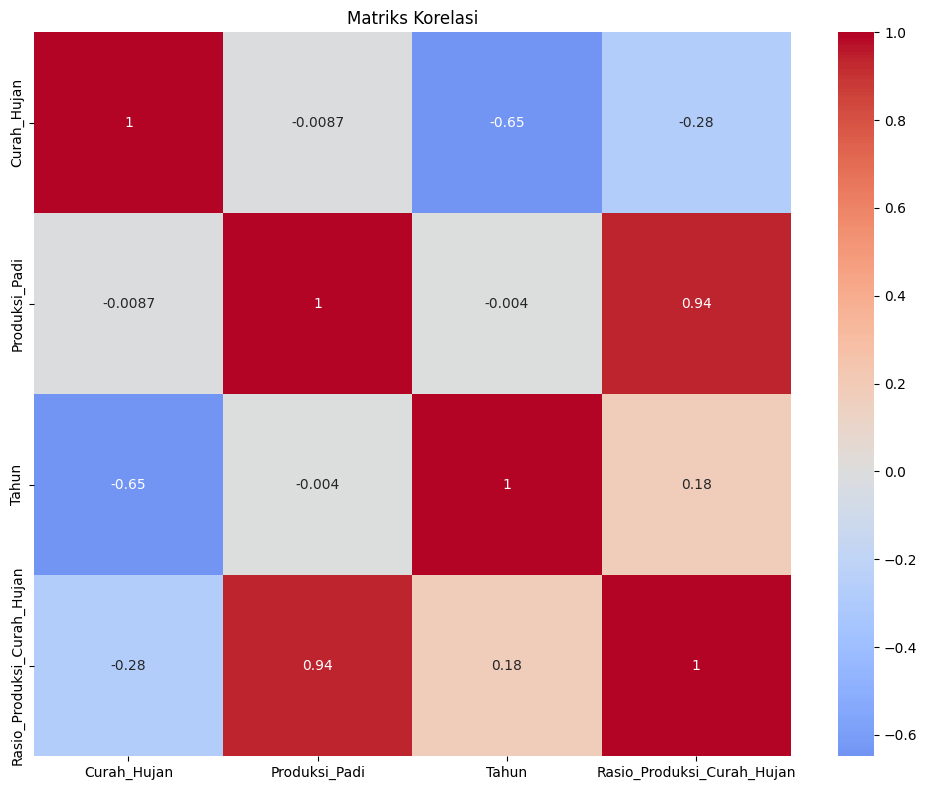

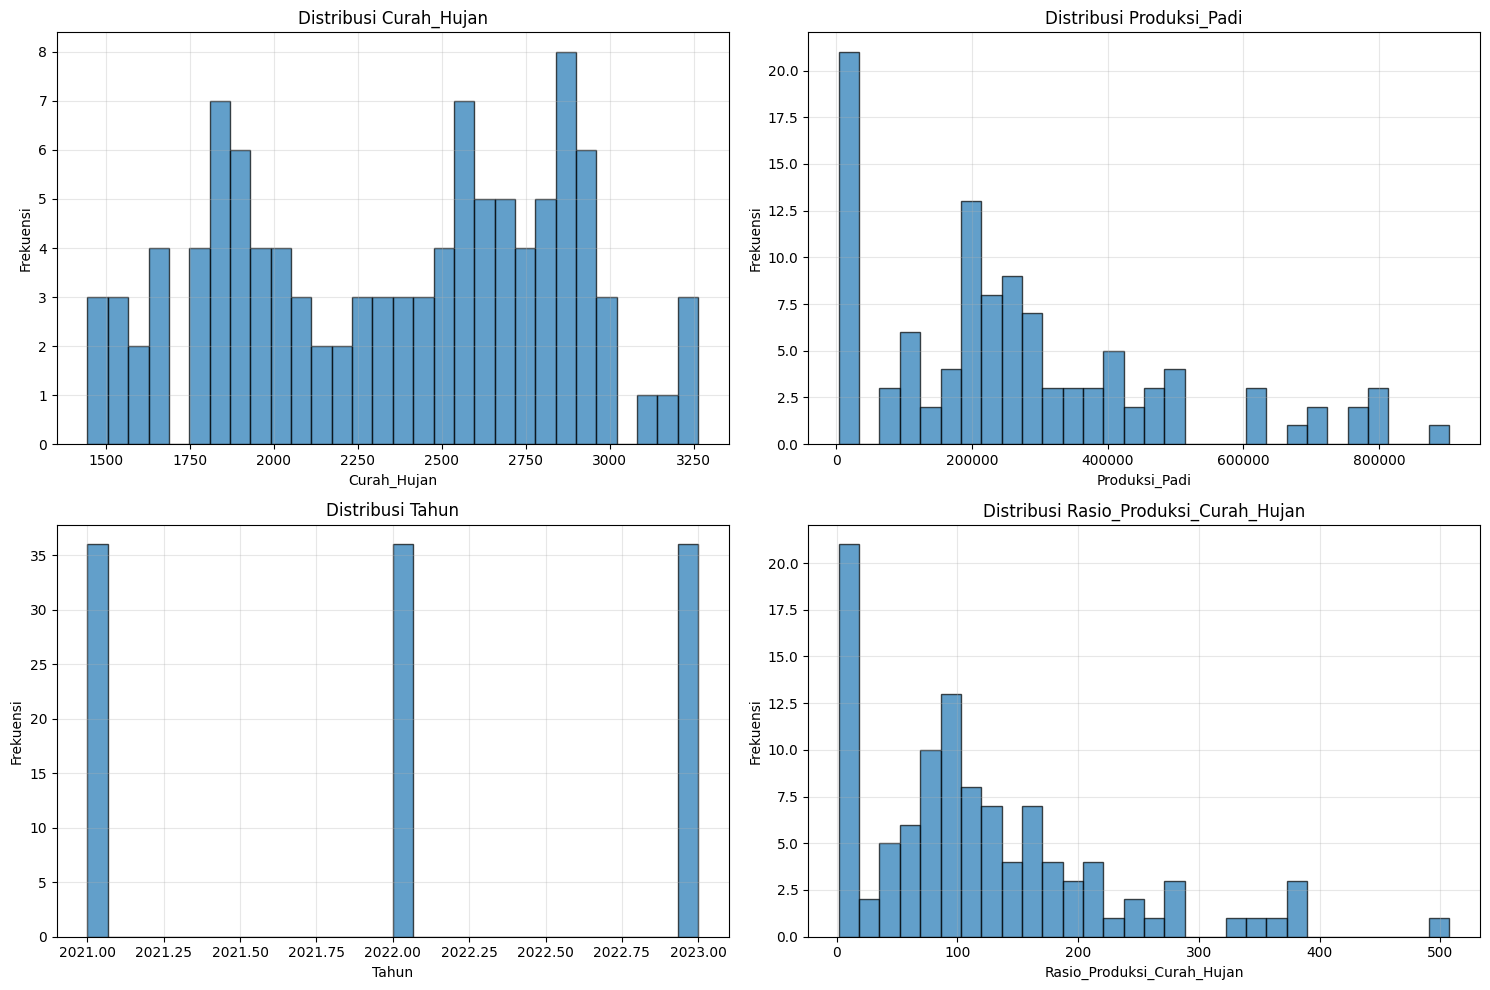


=== PERSIAPAN DATA REGRESI ===
Shape X_train: (86, 3)
Shape y_train: (86,)
Shape X_test: (22, 3)
Shape y_test: (22,)

=== 1. LINEAR REGRESSION ===
MSE: 7833643107.32
RMSE: 88507.87
MAE: 48951.17
R² Score: 0.8496

Koefisien Linear Regression:
Curah_Hujan: 112.7736
Tahun: 904.0071
Rasio_Produksi_Curah_Hujan: 2350.9158
Intercept: -2099659.4837

=== 2. RIDGE REGRESSION ===
Ridge Alpha 0.1: CV R² = 0.9590
Ridge Alpha 1.0: CV R² = 0.9590
Ridge Alpha 10.0: CV R² = 0.9591
Ridge Alpha 100.0: CV R² = 0.9593

Best Ridge Alpha: 100.0
MSE: 7821040966.60
RMSE: 88436.65
MAE: 48872.34
R² Score: 0.8498

=== 3. LASSO REGRESSION ===
Lasso Alpha 0.1: CV R² = 0.9590
Lasso Alpha 1.0: CV R² = 0.9590
Lasso Alpha 10.0: CV R² = 0.9590
Lasso Alpha 100.0: CV R² = 0.9590

Best Lasso Alpha: 100.0
MSE: 7831448600.32
RMSE: 88495.47
MAE: 48927.17
R² Score: 0.8496

=== 4. POLYNOMIAL REGRESSION ===
Polynomial Degree 2: CV R² = 1.0000
Polynomial Degree 3: CV R² = 1.0000

Best Polynomial Degree: 2
MSE: 0.00
RMSE: 0.00
MA

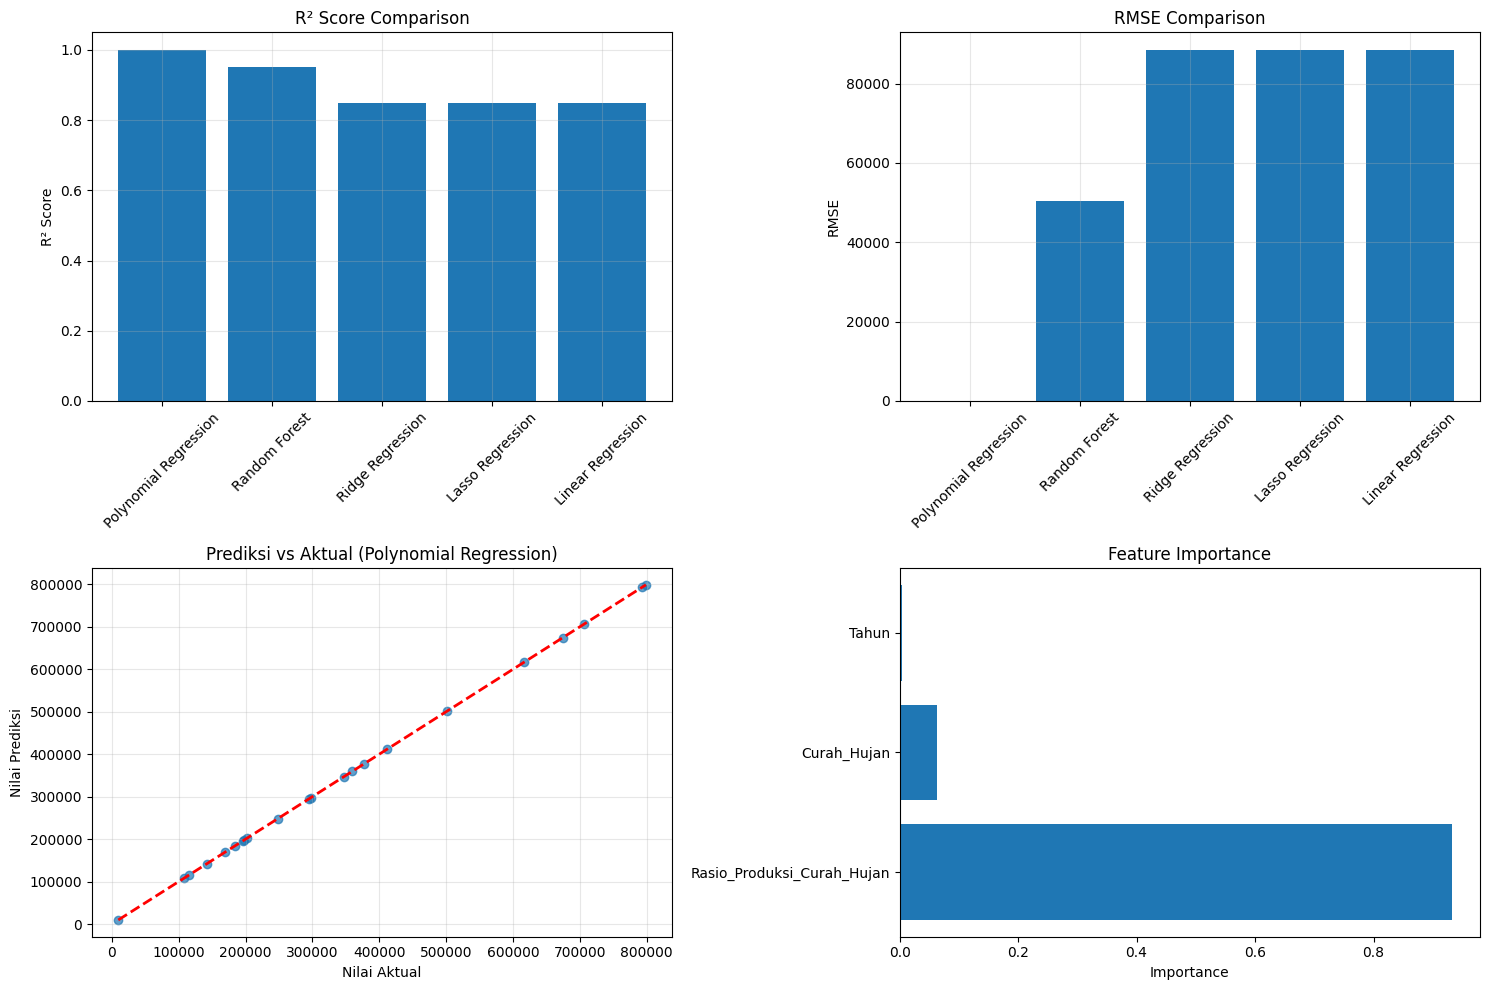

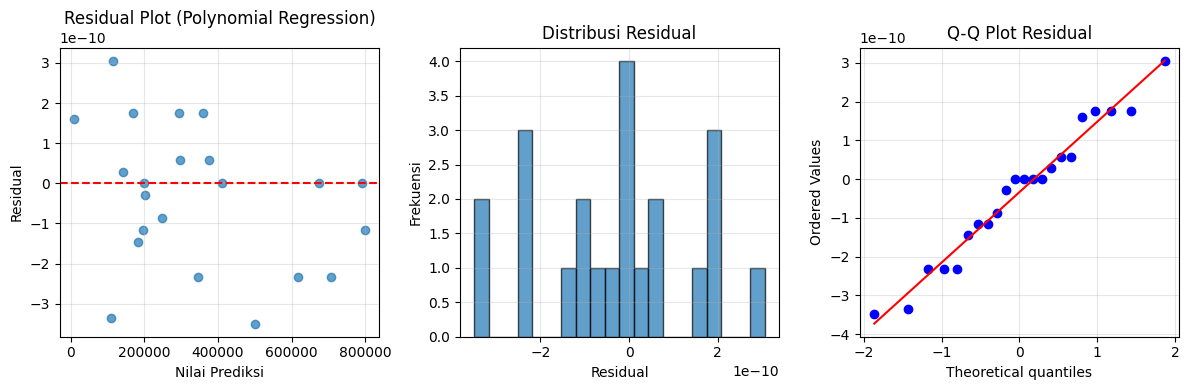


=== CONTOH PREDIKSI DENGAN MODEL TERBAIK (Polynomial Regression) ===
Prediksi produksi padi untuk:
- Curah hujan: 2500mm
- Tahun: 2024
- Rasio: 100
Hasil prediksi: 250000.00 ton

Model terbaik (Polynomial Regression) telah disimpan sebagai 'model_polynomial_regression.pkl'

=== ANALISIS KATEGORI PRODUKSI ===
                  Produksi_Padi                  Curah_Hujan          \
                           mean        std count        mean     std   
Kategori_Produksi                                                      
Rendah                 21733.08   31456.64    25     2442.10  455.00   
Sedang                235172.09   71268.27    57     2326.48  490.10   
Tinggi                578278.24  155834.17    26     2342.81  517.95   

                  Rasio_Produksi_Curah_Hujan         
                                        mean    std  
Kategori_Produksi                                    
Rendah                                  9.11  13.61  
Sedang                                10

In [ ]:
#Machine learning menggunakan regresi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Membaca data
df = pd.read_csv('/content/Data_Analysis_Ready.csv')

print("=== ANALISIS DATA UNTUK REGRESI ===")
print(f"Shape data: {df.shape}")
print(f"\nKorelasi antar variabel numerik:")
numeric_cols = ['Curah_Hujan', 'Produksi_Padi', 'Tahun', 'Rasio_Produksi_Curah_Hujan']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

# Distribusi data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Persiapan data
X = df[['Curah_Hujan', 'Tahun', 'Rasio_Produksi_Curah_Hujan']].values
y = df['Produksi_Padi'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n=== PERSIAPAN DATA REGRESI ===")
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

# Dictionary untuk menyimpan model dan hasil
models = {}
results = {}

# 1. LINEAR REGRESSION
print(f"\n=== 1. LINEAR REGRESSION ===")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

models['Linear Regression'] = lr_model
results['Linear Regression'] = {
    'MSE': lr_mse, 'RMSE': lr_rmse, 'MAE': lr_mae, 'R2': lr_r2, 'predictions': lr_pred
}

print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"R² Score: {lr_r2:.4f}")

# Koefisien dan interpretasi
feature_names = ['Curah_Hujan', 'Tahun', 'Rasio_Produksi_Curah_Hujan']
print(f"\nKoefisien Linear Regression:")
for i, coef in enumerate(lr_model.coef_):
    print(f"{feature_names[i]}: {coef:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

# 2. RIDGE REGRESSION
print(f"\n=== 2. RIDGE REGRESSION ===")
ridge_alphas = [0.1, 1.0, 10.0, 100.0]
best_ridge_score = -np.inf
best_ridge_alpha = None

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
    avg_score = scores.mean()
    print(f"Ridge Alpha {alpha}: CV R² = {avg_score:.4f}")

    if avg_score > best_ridge_score:
        best_ridge_score = avg_score
        best_ridge_alpha = alpha

ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

models['Ridge Regression'] = ridge_model
results['Ridge Regression'] = {
    'MSE': ridge_mse, 'RMSE': ridge_rmse, 'MAE': ridge_mae, 'R2': ridge_r2, 'predictions': ridge_pred
}

print(f"\nBest Ridge Alpha: {best_ridge_alpha}")
print(f"MSE: {ridge_mse:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"R² Score: {ridge_r2:.4f}")

# 3. LASSO REGRESSION
print(f"\n=== 3. LASSO REGRESSION ===")
lasso_alphas = [0.1, 1.0, 10.0, 100.0]
best_lasso_score = -np.inf
best_lasso_alpha = None

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
    avg_score = scores.mean()
    print(f"Lasso Alpha {alpha}: CV R² = {avg_score:.4f}")

    if avg_score > best_lasso_score:
        best_lasso_score = avg_score
        best_lasso_alpha = alpha

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

models['Lasso Regression'] = lasso_model
results['Lasso Regression'] = {
    'MSE': lasso_mse, 'RMSE': lasso_rmse, 'MAE': lasso_mae, 'R2': lasso_r2, 'predictions': lasso_pred
}

print(f"\nBest Lasso Alpha: {best_lasso_alpha}")
print(f"MSE: {lasso_mse:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"MAE: {lasso_mae:.2f}")
print(f"R² Score: {lasso_r2:.4f}")

# 4. POLYNOMIAL REGRESSION
print(f"\n=== 4. POLYNOMIAL REGRESSION ===")
poly_degrees = [2, 3]
best_poly_score = -np.inf
best_poly_degree = None

for degree in poly_degrees:
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    scores = cross_val_score(poly_pipeline, X_train, y_train, cv=5, scoring='r2')
    avg_score = scores.mean()
    print(f"Polynomial Degree {degree}: CV R² = {avg_score:.4f}")

    if avg_score > best_poly_score:
        best_poly_score = avg_score
        best_poly_degree = degree

poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=best_poly_degree)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
poly_pred = poly_pipeline.predict(X_test)

poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

models['Polynomial Regression'] = poly_pipeline
results['Polynomial Regression'] = {
    'MSE': poly_mse, 'RMSE': poly_rmse, 'MAE': poly_mae, 'R2': poly_r2, 'predictions': poly_pred
}

print(f"\nBest Polynomial Degree: {best_poly_degree}")
print(f"MSE: {poly_mse:.2f}")
print(f"RMSE: {poly_rmse:.2f}")
print(f"MAE: {poly_mae:.2f}")
print(f"R² Score: {poly_r2:.4f}")

# 5. RANDOM FOREST (sebagai pembanding)
print(f"\n=== 5. RANDOM FOREST REGRESSION ===")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'MSE': rf_mse, 'RMSE': rf_rmse, 'MAE': rf_mae, 'R2': rf_r2, 'predictions': rf_pred
}

print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R² Score: {rf_r2:.4f}")

# Feature importance untuk Random Forest
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Random Forest):")
print(feature_importance)

# PERBANDINGAN SEMUA MODEL
print(f"\n=== PERBANDINGAN SEMUA MODEL ===")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MSE': [results[model]['MSE'] for model in results.keys()],
    'RMSE': [results[model]['RMSE'] for model in results.keys()],
    'MAE': [results[model]['MAE'] for model in results.keys()],
    'R²': [results[model]['R2'] for model in results.keys()]
}).sort_values('R²', ascending=False)

print(comparison_df)

# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

# R² Score comparison
plt.subplot(2, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['R²'])
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')
plt.grid(True, alpha=0.3)

# RMSE comparison
plt.subplot(2, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['RMSE'])
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.grid(True, alpha=0.3)

# Scatter plot: Actual vs Predicted (best model)
best_model_name = comparison_df.iloc[0]['Model']
best_predictions = results[best_model_name]['predictions']

plt.subplot(2, 2, 3)
plt.scatter(y_test, best_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Prediksi vs Aktual ({best_model_name})')
plt.grid(True, alpha=0.3)

# Feature importance
plt.subplot(2, 2, 4)
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# Residual analysis untuk model terbaik
residuals = y_test - best_predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(best_predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual')
plt.title(f'Residual Plot ({best_model_name})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residual')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot Residual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Contoh prediksi dengan model terbaik
print(f"\n=== CONTOH PREDIKSI DENGAN MODEL TERBAIK ({best_model_name}) ===")
sample_data = np.array([[2500, 2024, 100]])
best_model = models[best_model_name]
prediction = best_model.predict(sample_data)

print(f"Prediksi produksi padi untuk:")
print(f"- Curah hujan: 2500mm")
print(f"- Tahun: 2024")
print(f"- Rasio: 100")
print(f"Hasil prediksi: {prediction[0]:.2f} ton")

# Menyimpan model terbaik
import joblib
joblib.dump(best_model, f'model_{best_model_name.lower().replace(" ", "_")}.pkl')
print(f"\nModel terbaik ({best_model_name}) telah disimpan sebagai 'model_{best_model_name.lower().replace(' ', '_')}.pkl'")

# Analisis kategori produksi
print(f"\n=== ANALISIS KATEGORI PRODUKSI ===")
category_analysis = df.groupby('Kategori_Produksi').agg({
    'Produksi_Padi': ['mean', 'std', 'count'],
    'Curah_Hujan': ['mean', 'std'],
    'Rasio_Produksi_Curah_Hujan': ['mean', 'std']
}).round(2)

print(category_analysis)

In [ ]:
!pip install scikit-learn seaborn

=== MEMUAT DATA ===
Data berhasil dimuat!
Shape data: (108, 7)
Kolom: ['Nama_Kota', 'Curah_Hujan', 'Produksi_Padi', 'Tahun', 'Rasio_Produksi_Curah_Hujan', 'Kategori_Curah_Hujan', 'Kategori_Produksi']

=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nama_Kota                   108 non-null    object 
 1   Curah_Hujan                 108 non-null    float64
 2   Produksi_Padi               108 non-null    float64
 3   Tahun                       108 non-null    int64  
 4   Rasio_Produksi_Curah_Hujan  108 non-null    float64
 5   Kategori_Curah_Hujan        108 non-null    object 
 6   Kategori_Produksi           108 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ KB
None

=== STATISTIK DESKRIPTIF ===
       Curah_Hujan  Produksi_Padi        Tahun  Rasio_Produksi_Cura

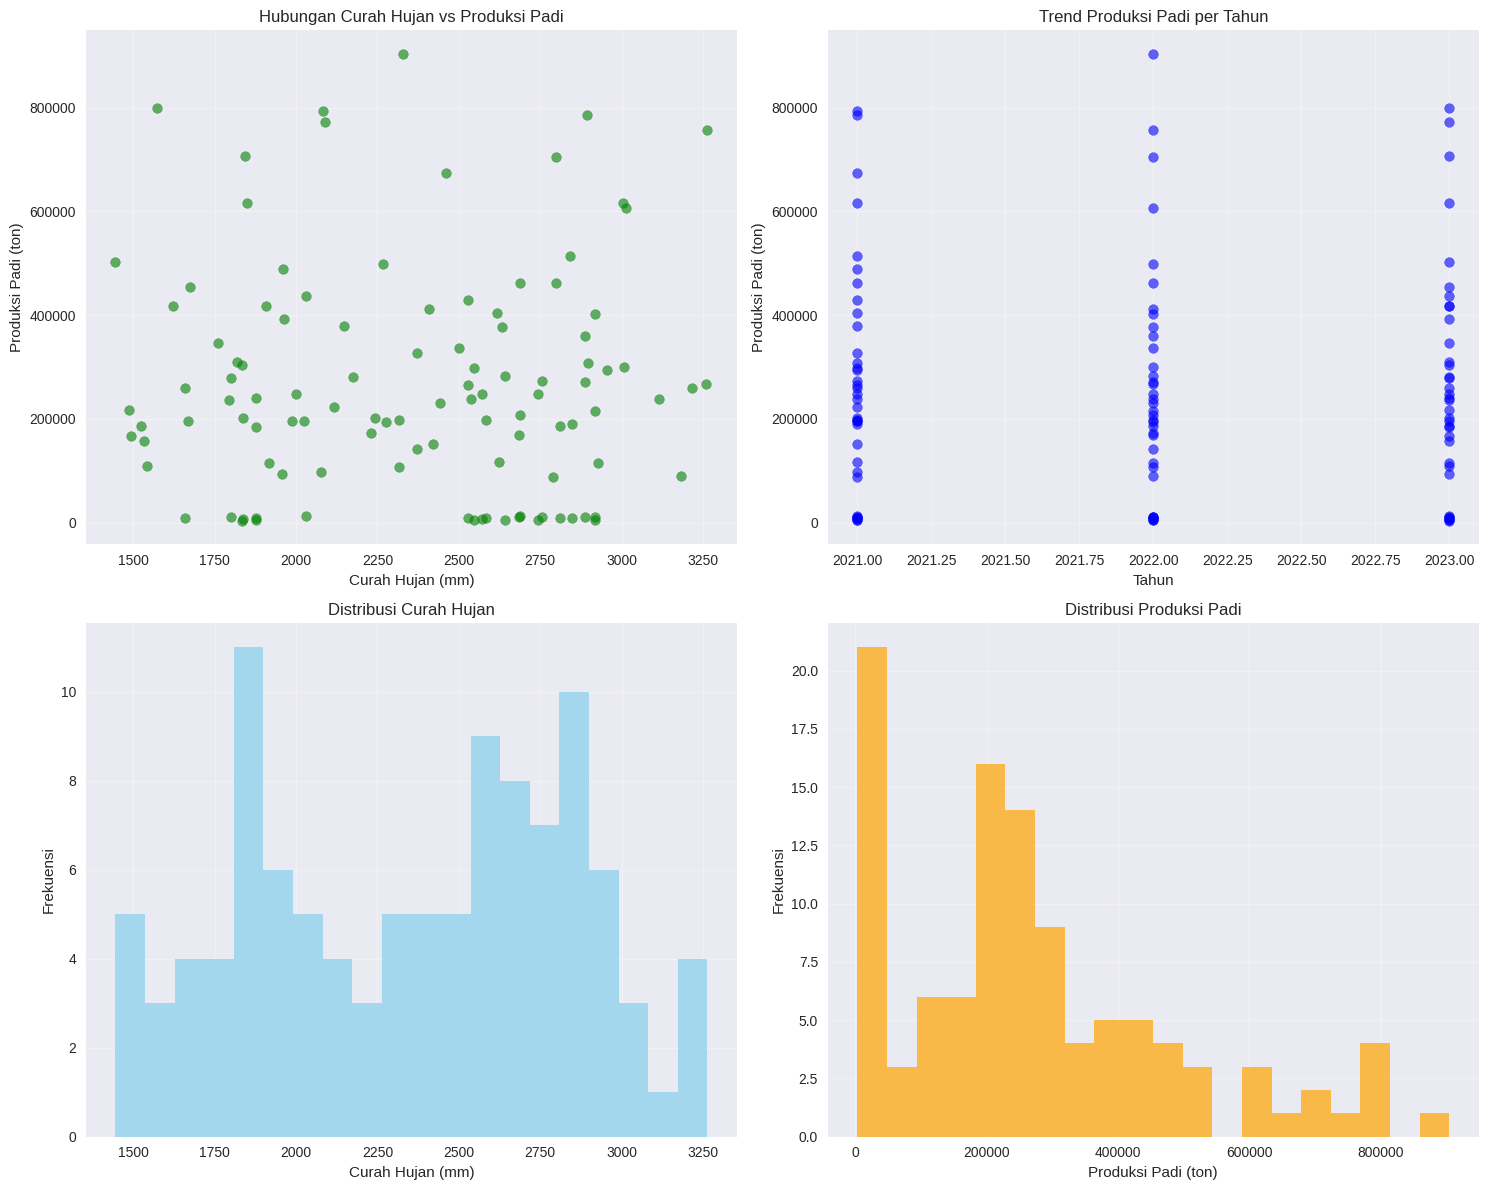


=== TRAINING MODEL ===
Model berhasil dilatih!

=== EVALUASI MODEL ===
Training R²: 0.0137
Testing R²: -0.3287
Training RMSE: 204771.49
Testing RMSE: 263050.41
Training MAE: 155929.47
Testing MAE: 190278.71

=== KOEFISIEN MODEL ===
Intercept: 246929.43
Curah_Hujan: 27346.0797
Tahun: 5396.1280

=== CONTOH PREDIKSI ===
Curah Hujan (mm) | Tahun | Prediksi Produksi (ton)
--------------------------------------------------
         2000 | 2024 |           238,402.70
         2500 | 2024 |           266,420.14
         3000 | 2024 |           294,437.58
         1500 | 2025 |           217,014.11
         2800 | 2025 |           289,859.46

=== FUNGSI PREDIKSI SIAP DIGUNAKAN ===
Gunakan: prediksi_custom(curah_hujan, tahun)
Contoh: prediksi_custom(2200, 2024)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi tampilan
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class RiceProductionPredictor:
    def __init__(self):
        self.model = LinearRegression()
        self.scaler = StandardScaler()
        self.is_trained = False
        self.feature_names = ['Curah_Hujan', 'Tahun']

    def load_data(self, file_path):
        """Load data dari CSV file"""
        try:
            # Baca data dari CSV
            self.df = pd.read_csv(file_path)
            print("Data berhasil dimuat!")
            print(f"Shape data: {self.df.shape}")
            print(f"Kolom: {list(self.df.columns)}")

            # Tampilkan info dasar
            print("\n=== INFO DATA ===")
            print(self.df.info())

            print("\n=== STATISTIK DESKRIPTIF ===")
            print(self.df.describe())

            return True
        except Exception as e:
            print(f"Error saat memuat data: {e}")
            return False

    def prepare_data(self):
        """Persiapkan data untuk training"""
        try:
            # Ambil kolom yang diperlukan
            features = ['Curah_Hujan', 'Produksi_Padi', 'Tahun']
            self.data = self.df[features].copy()

            # Hapus missing values
            self.data = self.data.dropna()

            # Prepare X dan y
            self.X = self.data[['Curah_Hujan', 'Tahun']]
            self.y = self.data['Produksi_Padi']

            print(f"Data siap untuk training: {len(self.data)} sampel")
            print(f"Features: {list(self.X.columns)}")

            return True

        except Exception as e:
            print(f"Error saat mempersiapkan data: {e}")
            return False

    def train_model(self, test_size=0.2, random_state=42):
        """Train model regresi linear"""
        try:
            # Split data
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y, test_size=test_size, random_state=random_state
            )

            # Scale features
            self.X_train_scaled = self.scaler.fit_transform(self.X_train)
            self.X_test_scaled = self.scaler.transform(self.X_test)

            # Train model
            self.model.fit(self.X_train_scaled, self.y_train)

            # Prediksi
            self.y_train_pred = self.model.predict(self.X_train_scaled)
            self.y_test_pred = self.model.predict(self.X_test_scaled)

            self.is_trained = True
            print("Model berhasil dilatih!")

            # Evaluasi
            self.evaluate_model()

            return True

        except Exception as e:
            print(f"Error saat training model: {e}")
            return False

    def evaluate_model(self):
        """Evaluasi performa model"""
        if not self.is_trained:
            print("Model belum dilatih!")
            return

        # Hitung metrik
        train_r2 = r2_score(self.y_train, self.y_train_pred)
        test_r2 = r2_score(self.y_test, self.y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
        train_mae = mean_absolute_error(self.y_train, self.y_train_pred)
        test_mae = mean_absolute_error(self.y_test, self.y_test_pred)

        print("\n=== EVALUASI MODEL ===")
        print(f"Training R²: {train_r2:.4f}")
        print(f"Testing R²: {test_r2:.4f}")
        print(f"Training RMSE: {train_rmse:.2f}")
        print(f"Testing RMSE: {test_rmse:.2f}")
        print(f"Training MAE: {train_mae:.2f}")
        print(f"Testing MAE: {test_mae:.2f}")

        # Koefisien model
        print("\n=== KOEFISIEN MODEL ===")
        print(f"Intercept: {self.model.intercept_:.2f}")
        for i, coef in enumerate(self.model.coef_):
            print(f"{self.feature_names[i]}: {coef:.4f}")

    def predict(self, curah_hujan, tahun):
        """Prediksi produksi padi"""
        if not self.is_trained:
            print("Model belum dilatih!")
            return None

        try:
            # Siapkan input
            input_data = np.array([[curah_hujan, tahun]])
            input_scaled = self.scaler.transform(input_data)

            # Prediksi
            prediction = self.model.predict(input_scaled)[0]

            return max(0, prediction)  # Pastikan tidak negatif

        except Exception as e:
            print(f"Error saat prediksi: {e}")
            return None

    def visualize_data(self):
        """Visualisasi data dan hasil"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Scatter plot: Curah Hujan vs Produksi
        axes[0,0].scatter(self.data['Curah_Hujan'], self.data['Produksi_Padi'],
                         alpha=0.6, color='green')
        axes[0,0].set_xlabel('Curah Hujan (mm)')
        axes[0,0].set_ylabel('Produksi Padi (ton)')
        axes[0,0].set_title('Hubungan Curah Hujan vs Produksi Padi')
        axes[0,0].grid(True, alpha=0.3)

        # 2. Scatter plot: Tahun vs Produksi
        axes[0,1].scatter(self.data['Tahun'], self.data['Produksi_Padi'],
                         alpha=0.6, color='blue')
        axes[0,1].set_xlabel('Tahun')
        axes[0,1].set_ylabel('Produksi Padi (ton)')
        axes[0,1].set_title('Trend Produksi Padi per Tahun')
        axes[0,1].grid(True, alpha=0.3)

        # 3. Distribusi Curah Hujan
        axes[1,0].hist(self.data['Curah_Hujan'], bins=20, alpha=0.7, color='skyblue')
        axes[1,0].set_xlabel('Curah Hujan (mm)')
        axes[1,0].set_ylabel('Frekuensi')
        axes[1,0].set_title('Distribusi Curah Hujan')
        axes[1,0].grid(True, alpha=0.3)

        # 4. Distribusi Produksi Padi
        axes[1,1].hist(self.data['Produksi_Padi'], bins=20, alpha=0.7, color='orange')
        axes[1,1].set_xlabel('Produksi Padi (ton)')
        axes[1,1].set_ylabel('Frekuensi')
        axes[1,1].set_title('Distribusi Produksi Padi')
        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Plot prediksi vs aktual
        if self.is_trained:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            plt.scatter(self.y_train, self.y_train_pred, alpha=0.6, color='blue', label='Training')
            plt.scatter(self.y_test, self.y_test_pred, alpha=0.6, color='red', label='Testing')
            plt.plot([self.y.min(), self.y.max()], [self.y.min(), self.y.max()], 'k--', lw=2)
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title('Prediksi vs Aktual')
            plt.legend()
            plt.grid(True, alpha=0.3)

            plt.subplot(1, 2, 2)
            residuals_train = self.y_train - self.y_train_pred
            residuals_test = self.y_test - self.y_test_pred
            plt.scatter(self.y_train_pred, residuals_train, alpha=0.6, color='blue', label='Training')
            plt.scatter(self.y_test_pred, residuals_test, alpha=0.6, color='red', label='Testing')
            plt.axhline(y=0, color='k', linestyle='--')
            plt.xlabel('Predicted')
            plt.ylabel('Residuals')
            plt.title('Residual Plot')
            plt.legend()
            plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

# === PENGGUNAAN ===

# 1. Inisialisasi predictor
predictor = RiceProductionPredictor()

# 2. Load data (ganti dengan path file CSV Anda)
# Untuk Google Colab, upload file terlebih dahulu
print("=== MEMUAT DATA ===")
file_path = "/content/Data_Analysis_Ready.csv"  # Ganti dengan nama file Anda

if predictor.load_data(file_path):
    # 3. Persiapkan data
    if predictor.prepare_data():
        # 4. Visualisasi data
        print("\n=== VISUALISASI DATA ===")
        predictor.visualize_data()

        # 5. Train model
        print("\n=== TRAINING MODEL ===")
        if predictor.train_model():
            # 6. Contoh prediksi
            print("\n=== CONTOH PREDIKSI ===")

            # Prediksi untuk beberapa skenario
            scenarios = [
                (2000, 2024),
                (2500, 2024),
                (3000, 2024),
                (1500, 2025),
                (2800, 2025)
            ]

            print("Curah Hujan (mm) | Tahun | Prediksi Produksi (ton)")
            print("-" * 50)

            for curah_hujan, tahun in scenarios:
                pred = predictor.predict(curah_hujan, tahun)
                if pred is not None:
                    print(f"{curah_hujan:13} | {tahun:4} | {pred:20,.2f}")

            # 7. Fungsi interaktif untuk prediksi custom
            def prediksi_custom(curah_hujan, tahun):
                """Fungsi untuk prediksi dengan input custom"""
                pred = predictor.predict(curah_hujan, tahun)
                if pred is not None:
                    print(f"\n🌾 HASIL PREDIKSI 🌾")
                    print(f"Curah Hujan: {curah_hujan:,} mm")
                    print(f"Tahun: {tahun}")
                    print(f"Prediksi Produksi Padi: {pred:,.2f} ton")

                    # Kategori produksi
                    if pred < 100000:
                        kategori = "Rendah"
                    elif pred < 400000:
                        kategori = "Sedang"
                    else:
                        kategori = "Tinggi"

                    print(f"Kategori Produksi: {kategori}")
                else:
                    print("Gagal melakukan prediksi!")

            print(f"\n=== FUNGSI PREDIKSI SIAP DIGUNAKAN ===")
            print("Gunakan: prediksi_custom(curah_hujan, tahun)")
            print("Contoh: prediksi_custom(2200, 2024)")

else:
    print("Gagal memuat data. Pastikan file CSV tersedia!")
    print("\nUntuk Google Colab:")
    print("1. Upload file CSV menggunakan files.upload()")
    print("2. Atau gunakan Google Drive dengan drive.mount()")

    print("\nContoh upload file:")
    print("from google.colab import files")
    print("uploaded = files.upload()")

=== PROGRAM MACHINE LEARNING REGRESSION ===
Program ini akan membantu Anda membuat model prediksi dari data CSV
Data berhasil dimuat!
Shape data: (108, 7)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nama_Kota                   108 non-null    object 
 1   Curah_Hujan                 108 non-null    float64
 2   Produksi_Padi               108 non-null    float64
 3   Tahun                       108 non-null    int64  
 4   Rasio_Produksi_Curah_Hujan  108 non-null    float64
 5   Kategori_Curah_Hujan        108 non-null    object 
 6   Kategori_Produksi           108 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ KB
None

=== PREVIEW DATA ===


,Nama_Kota,Curah_Hujan,Produksi_Padi,Tahun,Rasio_Produksi_Curah_Hujan,Kategori_Curah_Hujan,Kategori_Produksi
0,Bangkalan,2025.737521,195323.29,2021,96.420828,Sedang,Sedang
1,Banyuwangi,2842.277372,513490.07,2021,180.661492,Tinggi,Tinggi
2,Blitar,2744.285851,247366.27,2021,90.138668,Tinggi,Sedang
3,Blitar,2744.285851,5793.30,2021,2.111041,Tinggi,Rendah
4,Bojonegoro,2460.338970,674002.00,2021,273.946805,Sedang,Tinggi



=== STATISTIK DESKRIPTIF ===


,Curah_Hujan,Produksi_Padi,Tahun,Rasio_Produksi_Curah_Hujan
count,108.000000,108.000000,108.000000,108.000000
mean,2357.172427,268364.539259,2022.000000,119.638991
std,486.891199,216081.806437,0.820303,101.886967
min,1445.650450,3292.780000,2021.000000,1.733521
25%,1900.712938,113276.682500,2021.000000,47.262471
50%,2432.294696,236709.535000,2022.000000,99.533682
75%,2764.316603,382998.162500,2023.000000,166.363966
max,3263.261402,903882.290000,2023.000000,507.482047



=== KOLOM YANG TERSEDIA ===
1. Nama_Kota (Type: object)
2. Curah_Hujan (Type: float64)
3. Produksi_Padi (Type: float64)
4. Tahun (Type: int64)
5. Rasio_Produksi_Curah_Hujan (Type: float64)
6. Kategori_Curah_Hujan (Type: object)
7. Kategori_Produksi (Type: object)

=== PEMILIHAN FITUR DAN TARGET ===
Kolom yang tersedia:
1. Nama_Kota
2. Curah_Hujan
3. Produksi_Padi
4. Tahun
5. Rasio_Produksi_Curah_Hujan
6. Kategori_Curah_Hujan
7. Kategori_Produksi

Pilih nomor kolom untuk TARGET/OUTPUT (yang ingin diprediksi): 3

Target dipilih: Produksi_Padi
Sekarang pilih kolom untuk FITUR/INPUT (pisahkan dengan koma jika lebih dari satu):
1. Nama_Kota
2. Curah_Hujan
3. Tahun
4. Rasio_Produksi_Curah_Hujan
5. Kategori_Curah_Hujan
6. Kategori_Produksi

Masukkan nomor kolom fitur (contoh: 1,2,3): 1

Fitur dipilih: ['Nama_Kota']
Target dipilih: Produksi_Padi
Encoded categorical feature: Nama_Kota

Data siap untuk training:
Features shape: (108, 1)
Target shape: (108,)

=== PILIH TIPE MODEL ===
1. Linear R

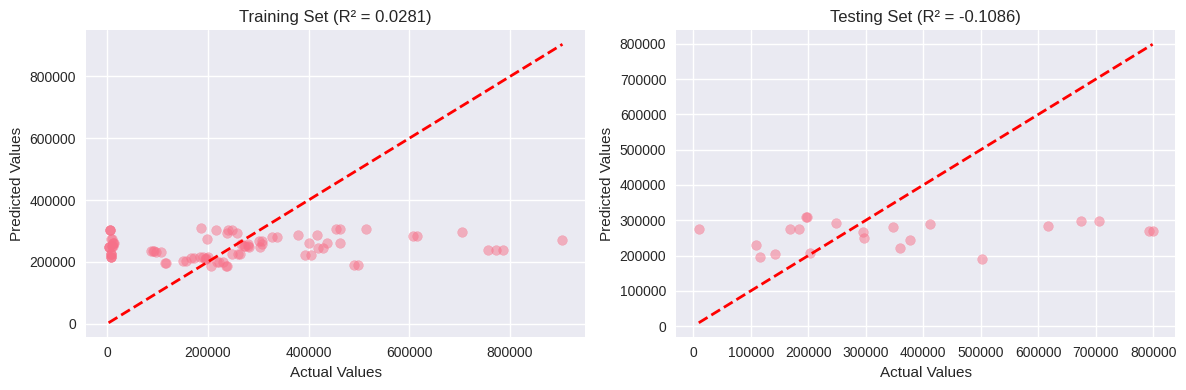


=== MENU ===
1. Buat prediksi baru
2. Lihat evaluasi model lagi
3. Ganti model
4. Keluar
Pilih menu (1-4): 2

=== EVALUASI MODEL ===
Training MSE: 41319571663.09
Testing MSE: 57730577300.56
Training R²: 0.0281
Testing R²: -0.1086
Training MAE: 152559.72
Testing MAE: 182864.76


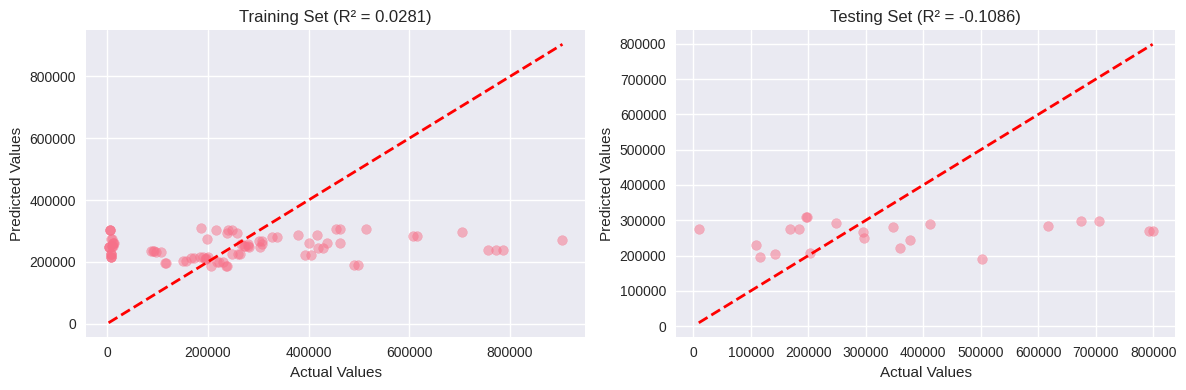


=== MENU ===
1. Buat prediksi baru
2. Lihat evaluasi model lagi
3. Ganti model
4. Keluar
Pilih menu (1-4): 3
Pilih model baru:
1. Linear Regression
2. Random Forest Regression
Pilih model (1 atau 2): 2

=== MODEL RANDOM FOREST REGRESSION BERHASIL DILATIH ===

=== EVALUASI MODEL ===
Training MSE: 10177647523.03
Testing MSE: 7959886906.43
Training R²: 0.7606
Testing R²: 0.8471
Training MAE: 76965.22
Testing MAE: 70931.01


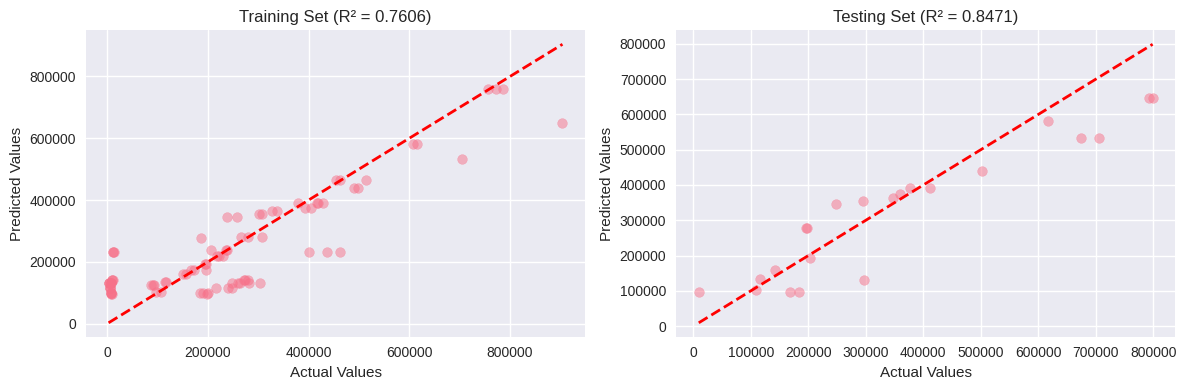


=== MENU ===
1. Buat prediksi baru
2. Lihat evaluasi model lagi
3. Ganti model
4. Keluar
Pilih menu (1-4): 4
Terima kasih telah menggunakan program ini!


In [ ]:
#MCAHINE LEARNING MENGGUNAKAN METODE REGRESI DAN MEMAKAI 2 REGRESI, LINEAR REGRESION DAN RANDOM FOREST REGRESION MENANGANI DATA KATEGORIAL DAN NUMERIK,
#EVALUASI LENGKAP MENGGUNAKAN MSE, R2, MAE, DAN VISUALISASI, INPUT NILAI SENDIRI UNTUK PREDIKSI

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

class MLPredictor:
    def __init__(self, file_path):
        """
        Inisialisasi class MLPredictor
        """
        self.file_path = file_path
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = None
        self.label_encoders = {}
        self.target_label_encoder = None # Added for target encoding
        self.target_col_name = None # Added to store target column name

    def load_data(self):
        """
        Memuat data dari file CSV
        """
        try:
            self.df = pd.read_csv(self.file_path)
            print("Data berhasil dimuat!")
            print(f"Shape data: {self.df.shape}")
            print("\nInfo Dataset:")
            print(self.df.info())
            return True
        except Exception as e:
            print(f"Error memuat data: {e}")
            return False

    def show_data_preview(self):
        """
        Menampilkan preview data
        """
        if self.df is not None:
            print("\n=== PREVIEW DATA ===")
            display(self.df.head())

            print("\n=== STATISTIK DESKRIPTIF ===")
            numeric_cols = self.df.select_dtypes(include=[np.number]).columns
            display(self.df[numeric_cols].describe())

            print("\n=== KOLOM YANG TERSEDIA ===")
            for i, col in enumerate(self.df.columns, 1):
                print(f"{i}. {col} (Type: {self.df[col].dtype})")
        else:
            print("Data belum dimuat. Jalankan load_data() terlebih dahulu.")

    def select_features_and_target(self):
        """
        Memilih fitur input dan target output secara interaktif
        """
        if self.df is None:
            print("Data belum dimuat!")
            return False

        print("\n=== PEMILIHAN FITUR DAN TARGET ===")
        print("Kolom yang tersedia:")
        for i, col in enumerate(self.df.columns, 1):
            print(f"{i}. {col}")

        # Pilih target variable
        while True:
            try:
                target_idx = int(input("\nPilih nomor kolom untuk TARGET/OUTPUT (yang ingin diprediksi): ")) - 1
                if 0 <= target_idx < len(self.df.columns):
                    target_col = self.df.columns[target_idx]
                    self.target_col_name = target_col # Store target column name
                    break
                else:
                    print("Nomor tidak valid!")
            except ValueError:
                print("Masukkan nomor yang valid!")

        # Pilih feature variables
        print(f"\nTarget dipilih: {target_col}")
        print("Sekarang pilih kolom untuk FITUR/INPUT (pisahkan dengan koma jika lebih dari satu):")

        available_features = [col for col in self.df.columns if col != target_col]
        for i, col in enumerate(available_features, 1):
            print(f"{i}. {col}")

        while True:
            try:
                feature_input = input("\nMasukkan nomor kolom fitur (contoh: 1,2,3): ")
                feature_indices = [int(x.strip()) - 1 for x in feature_input.split(',')]

                if all(0 <= idx < len(available_features) for idx in feature_indices):
                    feature_cols = [available_features[idx] for idx in feature_indices]
                    break
                else:
                    print("Ada nomor yang tidak valid!")
            except ValueError:
                print("Format input tidak valid! Gunakan format: 1,2,3")

        print(f"\nFitur dipilih: {feature_cols}")
        print(f"Target dipilih: {target_col}")

        # Preprocessing data
        self.preprocess_data(feature_cols, target_col)
        return True

    def preprocess_data(self, feature_cols, target_col):
        """
        Preprocessing data termasuk encoding untuk variabel kategorikal
        """
        # Buat copy dataframe untuk preprocessing
        df_processed = self.df.copy()

        # Handle missing values
        df_processed = df_processed.dropna()

        # Encode categorical feature variables
        self.label_encoders = {} # Reset encoders
        for col in feature_cols:
            if df_processed[col].dtype == 'object':
                le = LabelEncoder()
                df_processed[col] = le.fit_transform(df_processed[col])
                self.label_encoders[col] = le
                print(f"Encoded categorical feature: {col}")

        # Encode categorical target variable if necessary
        if df_processed[target_col].dtype == 'object':
            print(f"Encoding categorical target: {target_col}")
            self.target_label_encoder = LabelEncoder()
            df_processed[target_col] = self.target_label_encoder.fit_transform(df_processed[target_col])
        else:
            self.target_label_encoder = None # Ensure it's None if target is not categorical

        # Prepare features and target
        self.X = df_processed[feature_cols]
        self.y = df_processed[target_col]

        print(f"\nData siap untuk training:")
        print(f"Features shape: {self.X.shape}")
        print(f"Target shape: {self.y.shape}")


    def train_model(self, model_type='linear'):
        """
        Melatih model machine learning
        """
        if self.X is None or self.y is None:
            print("Data belum diproses!")
            return False

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Scaling features (only for linear models typically)
        # Adjusted scaling to be applied based on model type or always if beneficial
        self.scaler = StandardScaler()
        # Fit scaler on training data
        self.scaler.fit(self.X_train)

        self.X_train_scaled = self.scaler.transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)


        # Pilih model
        if model_type == 'linear':
            self.model = LinearRegression()
            model_name = "Linear Regression"
            # Train Linear Regression on scaled data
            self.model.fit(self.X_train_scaled, self.y_train)
        elif model_type == 'random_forest':
            self.model = RandomForestRegressor(n_estimators=100, random_state=42)
            model_name = "Random Forest Regression"
            # Train Random Forest on original or scaled data (RF is less sensitive to scale)
            # Using original data here as RF doesn't require scaling
            self.model.fit(self.X_train, self.y_train)
        else:
             print(f"Model type '{model_type}' not supported.")
             return False


        print(f"\n=== MODEL {model_name.upper()} BERHASIL DILATIH ===")
        return True

    def evaluate_model(self, model_type='linear'):
        """
        Evaluasi performa model
        """
        if self.model is None:
            print("Model belum dilatih!")
            return

        # Prediksi
        if model_type == 'linear':
            y_pred_train = self.model.predict(self.X_train_scaled)
            y_pred_test = self.model.predict(self.X_test_scaled)
        elif model_type == 'random_forest':
             # Predict using original test data for RF
             y_pred_train = self.model.predict(self.X_train)
             y_pred_test = self.model.predict(self.X_test)
        else:
            print(f"Model type '{model_type}' not supported for evaluation.")
            return


        # If the target was encoded, predictions are numerical labels.
        # We might want to evaluate metrics on numerical labels or
        # convert back to original categories for interpretation.
        # For regression metrics (MSE, R2, MAE), we must use numerical labels.
        # If the target was originally categorical, these metrics are less intuitive.
        # This program seems designed for regression (predicting a number).
        # If 'Kategori_Produksi' was selected as the target, the model is
        # predicting numerical labels (0, 1, 2). The metrics will reflect this.

        # Hitung metrik
        train_mse = mean_squared_error(self.y_train, y_pred_train)
        test_mse = mean_squared_error(self.y_test, y_pred_test)
        train_r2 = r2_score(self.y_train, y_pred_train)
        test_r2 = r2_score(self.y_test, y_pred_test)
        train_mae = mean_absolute_error(self.y_train, y_pred_train)
        test_mae = mean_absolute_error(self.y_test, y_pred_test)

        print("\n=== EVALUASI MODEL ===")
        print(f"Training MSE: {train_mse:.2f}")
        print(f"Testing MSE: {test_mse:.2f}")
        print(f"Training R²: {train_r2:.4f}")
        print(f"Testing R²: {test_r2:.4f}")
        print(f"Training MAE: {train_mae:.2f}")
        print(f"Testing MAE: {test_mae:.2f}")

        # Plot results
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.scatter(self.y_train, y_pred_train, alpha=0.5)
        # Adjust plot line range if target was encoded (numerical labels 0, 1, ...)
        y_min_plot = min(self.y_train.min(), y_pred_train.min())
        y_max_plot = max(self.y_train.max(), y_pred_train.max())
        plt.plot([y_min_plot, y_max_plot],
                [y_min_plot, y_max_plot], 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Training Set (R² = {train_r2:.4f})')

        plt.subplot(1, 2, 2)
        plt.scatter(self.y_test, y_pred_test, alpha=0.5)
        # Adjust plot line range
        y_min_plot = min(self.y_test.min(), y_pred_test.min())
        y_max_plot = max(self.y_test.max(), y_pred_test.max())
        plt.plot([y_min_plot, y_max_plot],
                [y_min_plot, y_max_plot], 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Testing Set (R² = {test_r2:.4f})')

        plt.tight_layout()
        plt.show()

        return {
            'train_mse': train_mse, 'test_mse': test_mse,
            'train_r2': train_r2, 'test_r2': test_r2,
            'train_mae': train_mae, 'test_mae': test_mae
        }

    def make_prediction(self, model_type='linear'):
        """
        Membuat prediksi dengan input manual
        """
        if self.model is None or self.X is None:
            print("Model belum dilatih atau data belum diproses!")
            return None

        print("\n=== PREDIKSI DENGAN INPUT MANUAL ===")
        print("Masukkan nilai untuk setiap fitur:")

        input_values = []
        for col in self.X.columns:
            while True:
                try:
                    if col in self.label_encoders:
                        # Handle categorical feature input
                        print(f"\nFitur: {col} (Categorical)")
                        # Get original classes from the stored encoder
                        original_classes = list(self.label_encoders[col].classes_)
                        print("Nilai yang tersedia:", original_classes)
                        value = input(f"Masukkan nilai untuk {col}: ")
                        if value in original_classes:
                            encoded_value = self.label_encoders[col].transform([value])[0]
                            input_values.append(encoded_value)
                            break
                        else:
                            print("Nilai tidak valid! Pilih dari nilai yang tersedia.")
                    else:
                        # Handle numerical feature input
                        value = float(input(f"Masukkan nilai untuk {col}: "))
                        input_values.append(value)
                        break
                except ValueError:
                    print("Masukkan nilai numerik yang valid!")

        # Buat prediksi
        input_array = np.array(input_values).reshape(1, -1)

        if model_type == 'linear':
            input_scaled = self.scaler.transform(input_array)
            prediction = self.model.predict(input_scaled)[0]
        elif model_type == 'random_forest':
            # Predict using original input values for RF
            prediction = self.model.predict(input_array)[0]
        else:
            print(f"Model type '{model_type}' not supported for prediction.")
            return None


        print(f"\n=== HASIL PREDIKSI ===")
        # If the target was encoded, inverse transform the prediction
        if self.target_label_encoder is not None:
            # For regression models predicting encoded categorical labels,
            # the prediction might not be an exact integer. We should
            # round it to the nearest integer and then inverse transform.
            # However, predicting exact categories with regression might not be ideal.
            # If the intent was classification, a classification model should be used.
            # Assuming the user *might* have selected a categorical target,
            # we attempt to interpret the prediction.
            # A more robust approach would be to handle classification targets differently.
            # For now, we'll round and inverse transform, but warn about potential issues.
            rounded_prediction = round(prediction)
            try:
                 # Check if the rounded prediction corresponds to a valid encoded label
                 if rounded_prediction >= 0 and rounded_prediction < len(self.target_label_encoder.classes_):
                     predicted_category = self.target_label_encoder.inverse_transform([rounded_prediction])[0]
                     print(f"Prediksi (Kategori {self.target_col_name}): {predicted_category}")
                     print("(Catatan: Model regresi digunakan untuk memprediksi kategori yang di-encode. Hasil ini adalah interpretasi dari nilai prediksi numerik terdekat.)")
                 else:
                     print(f"Prediksi numerik: {prediction:.2f}")
                     print(f"Prediksi numerik ({prediction:.2f}) di luar rentang label yang di-encode. Tidak dapat diinterpretasikan sebagai kategori {self.target_col_name}.")
            except Exception as e:
                 print(f"Prediksi numerik: {prediction:.2f}")
                 print(f"Error saat menginterpretasikan prediksi sebagai kategori: {e}")
        else:
            # If the target was numerical, print the prediction directly
            print(f"Nilai prediksi ({self.target_col_name}): {prediction:.2f}")

        return prediction

# Fungsi utama untuk menjalankan program
def run_ml_program():
    """
    Fungsi utama untuk menjalankan program ML
    """
    print("=== PROGRAM MACHINE LEARNING REGRESSION ===")
    print("Program ini akan membantu Anda membuat model prediksi dari data CSV")

    # Inisialisasi
    file_path = "/content/Data_Analysis_Ready.csv" # Pastikan path ini benar
    ml = MLPredictor(file_path)

    # Load data
    if not ml.load_data():
        return

    # Preview data
    ml.show_data_preview()

    # Pilih fitur dan target
    if not ml.select_features_and_target():
        return

    # Pilih tipe model
    print("\n=== PILIH TIPE MODEL ===")
    print("1. Linear Regression")
    print("2. Random Forest Regression")

    while True:
        try:
            model_choice = int(input("Pilih model (1 atau 2): "))
            if model_choice == 1:
                model_type = 'linear'
                break
            elif model_choice == 2:
                model_type = 'random_forest'
                break
            else:
                print("Pilihan tidak valid!")
        except ValueError:
            print("Masukkan nomor yang valid!")

    # Train model
    if not ml.train_model(model_type):
        return

    # Evaluasi model
    results = ml.evaluate_model(model_type)

    # Menu interaktif
    while True:
        print("\n=== MENU ===")
        print("1. Buat prediksi baru")
        print("2. Lihat evaluasi model lagi")
        print("3. Ganti model")
        print("4. Keluar")

        try:
            choice = int(input("Pilih menu (1-4): "))

            if choice == 1:
                ml.make_prediction(model_type)
            elif choice == 2:
                ml.evaluate_model(model_type)
            elif choice == 3:
                print("Pilih model baru:")
                print("1. Linear Regression")
                print("2. Random Forest Regression")
                new_model_choice = int(input("Pilih model (1 atau 2): "))
                if new_model_choice == 1:
                    new_model_type = 'linear'
                elif new_model_choice == 2:
                    new_model_type = 'random_forest'
                else:
                    print("Pilihan tidak valid!")
                    continue # Stay in the menu loop
                if ml.train_model(new_model_type):
                    ml.evaluate_model(new_model_type)
                    model_type = new_model_type # Update the current model type
                else:
                    print("Gagal mengganti model.")
            elif choice == 4:
                print("Terima kasih telah menggunakan program ini!")
                break
            else:
                print("Pilihan tidak valid!")
        except ValueError:
            print("Masukkan nomor yang valid!")

# Jalankan program
if __name__ == "__main__":
    run_ml_program()

In [ ]:
# LANGKAH 1: Upload file CSV
from google.colab import files
uploaded = files.upload()

# LANGKAH 2: Proses data
import pandas as pd

# Ganti sesuai nama file yang Anda upload
file_name = "/content/Data_Gabungan_Final.csv"

# Baca file
df = pd.read_csv(file_name)

# Unpivot: ubah dari bentuk lebar ke panjang
df_melted = df.melt(id_vars=["Nama_Kota"], var_name="Jenis_Data", value_name="Nilai")

# Pisahkan 'Jenis_Data' jadi dua kolom: Kategori dan Tahun
df_melted[['Kategori', 'Tahun']] = df_melted['Jenis_Data'].str.rsplit('_', n=1, expand=True)

# Urutkan kolom
df_final = df_melted[['Nama_Kota', 'Kategori', 'Tahun', 'Nilai']]

# LANGKAH 3: Simpan hasil
output_name = "Data_Gabungan_Final_Transformed.csv"
df_final.to_csv(output_name, index=False)

# LANGKAH 4: Download hasil
files.download(output_name)


Saving Data_Gabungan_Final.csv to Data_Gabungan_Final (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>